<a href="https://colab.research.google.com/github/evelynsoares/perceptron-mlp-pytorch/blob/main/Evelyn_Soares_Pereira_170102785_Perceptron_e_MLP_com_scripts_programados_com_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade - Perceptron e MLP com scripts programados com PyTorch**

**Observação:** Os trabalhos serão avaliados apenas se implementados por PyTorch.

*   **Nome**: Evelyn Soares Pereira
*   **Matrícula**: 170102785

---

# **Diagnóstico de Diabetes com Redes Neurais**

Nesta atividade, vamos trabalhar com um problema aplicado de **classificação binária**: prever se uma pessoa possui ou não diabetes com base em um conjunto de variáveis clínicas.

[Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

---

## **Contexto**

- O dataset utilizado é o **Pima Indians Diabetes Dataset**, coletado originalmente pelo Instituto Nacional de Diabetes e Doenças Digestivas e Renais dos Estados Unidos.
- Ele contém registros de mulheres com pelo menos 21 anos de idade da população Pima, um grupo étnico nativo norte-americano com alta incidência de diabetes tipo 2.

## **Objetivo**

O objetivo é treinar uma MLP para prever a presença de diabetes a partir de atributos fisiológicos e laboratoriais.

## **Variáveis de entrada**

Cada observação contém os seguintes atributos:

1. **Pregnancies**, number of times pregnant: Variável discreta.
2. **Glucose**, plasma glucose concentration after 2 hours in an oral glucose tolerance test: Variável contínua.
3. **BloodPressure**, diastolic blood pressure, in mm Hg: Variável contínua.
4. **SkinThickness**, triceps skin fold thickness, in mm: Variável contínua.
5. **Insulin**, 2-hour serum insulin, in μU/mL: Variável contínua.
6. **BMI**, body mass index, weight in kg/(height in m)²: Variável contínua.
7. **DiabetesPedigreeFunction**, family history function: Variável contínua.
8. **Age**, in years: : Variável discreta.

## **Variáveis de saída (Target)**

- **Outcome = 1**: Diabetic
- **Outcome = 0**: Non-diabetic


# **Exercício 1 - Preparação dos dados**

1. Apresente um resumo estatístico básico e visualizações simples, como correlação entre variáveis e histogramas procurando inconsistências que podem afetar a construção do modelo.
2. Faça a divisão dos dados:
  - 70% para treino
  - 15% para validação
  - 15% para teste

Use como exemplo a aula colab do dia 21/05/2025.
```python
import pandas as pd

# URL do dataset
url = "https://raw.githubusercontent.com/pcbrom/perceptron-mlp-cnn/refs/heads/main/data/diabetes.csv"

# Carregar o dataset
df = pd.read_csv(url)
```





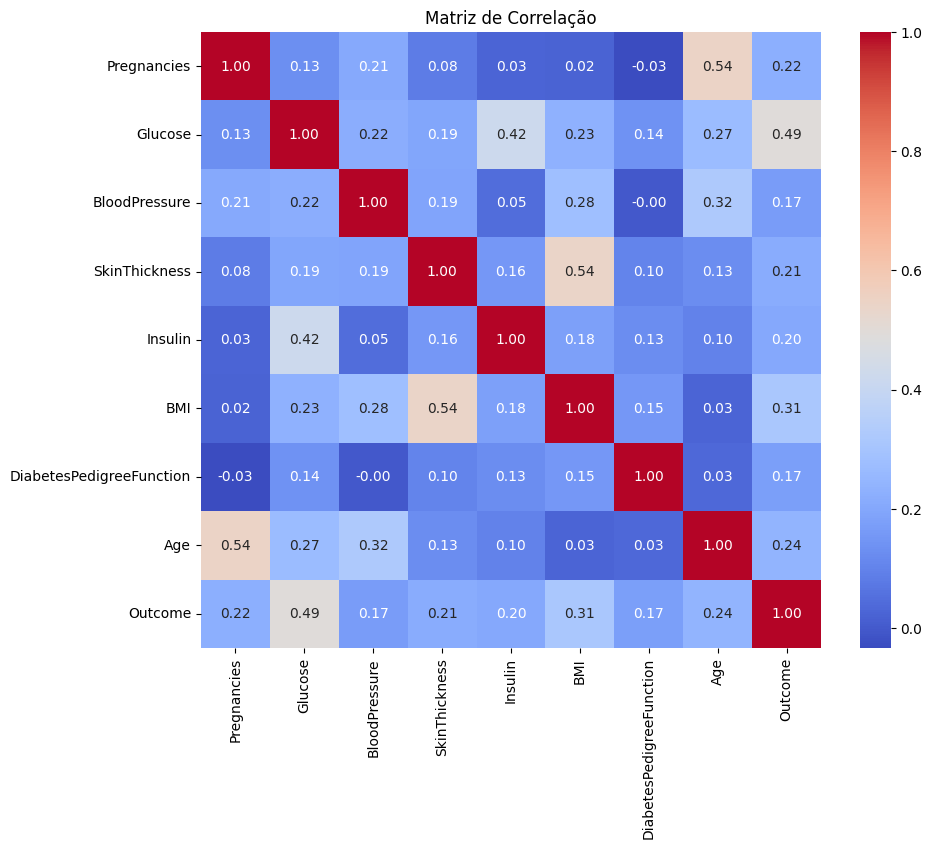

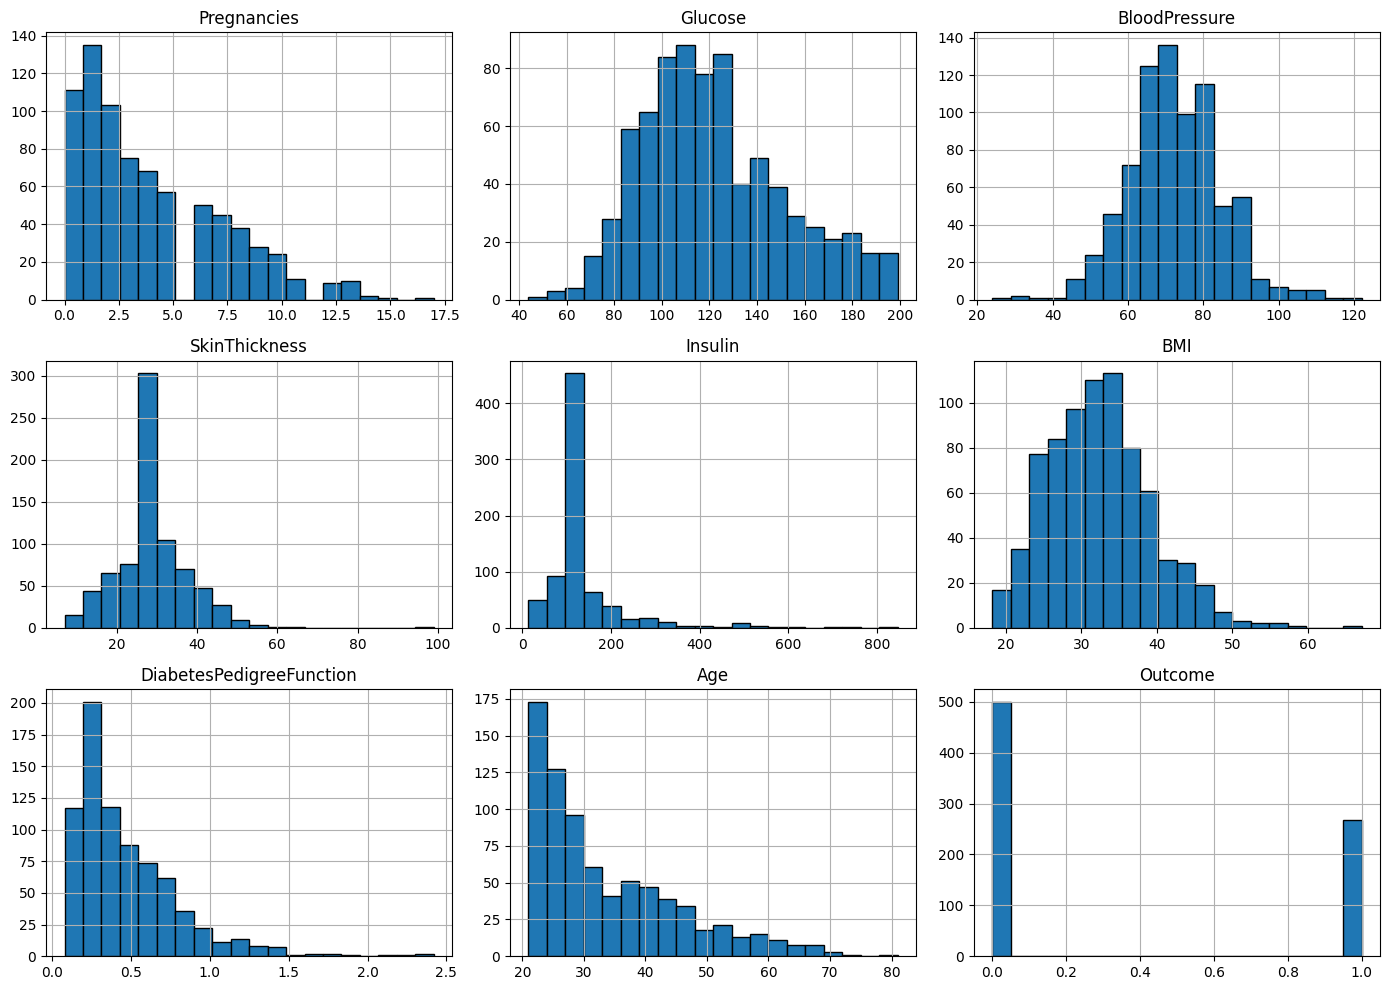

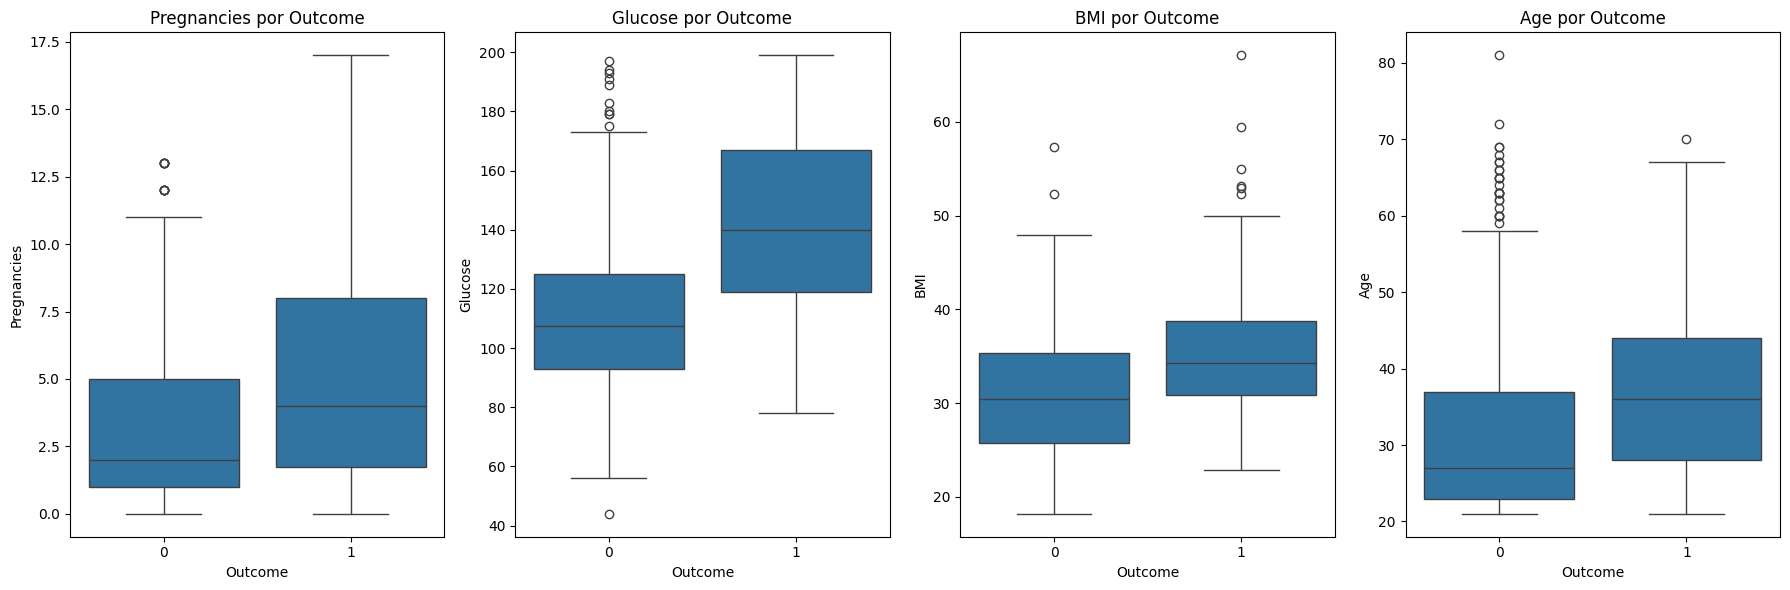

Shape X_train: torch.Size([537, 8])
Shape y_train: torch.Size([537, 1])
Shape X_val: torch.Size([115, 8])
Shape y_val: torch.Size([115, 1])
Shape X_test: torch.Size([116, 8])
Shape y_test: torch.Size([116, 1])


In [ ]:
# Preparação dos Dados para MLP com PyTorch - Diagnóstico de Diabetes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# --- Carregamento do Dataset ---
url = "https://raw.githubusercontent.com/pcbrom/perceptron-mlp-cnn/refs/heads/main/data/diabetes.csv"
df = pd.read_csv(url)

# --- Tratamento de Dados Ausentes ---
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].fillna(df[cols_with_invalid_zeros].median())

# --- Visualizações ---
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

# Histogramas
_ = df.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Boxplots por Outcome
plt.figure(figsize=(18, 6))
for i, col in enumerate(['Pregnancies', 'Glucose', 'BMI', 'Age']):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} por Outcome')
plt.tight_layout()
plt.show()

# --- Divisão dos Dados ---
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# --- Padronização ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# --- Conversão para Tensores PyTorch ---
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)

X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Shapes finais (para checagem - podem ser comentados no relatório final)
print("Shape X_train:", X_train_tensor.shape)
print("Shape y_train:", y_train_tensor.shape)
print("Shape X_val:", X_val_tensor.shape)
print("Shape y_val:", y_val_tensor.shape)
print("Shape X_test:", X_test_tensor.shape)
print("Shape y_test:", y_test_tensor.shape)


# **Exercício 2 - Construção MLP**

1. Proponha uma arquiterura de MLP, defina os hiperparâmetros, otimizador, função de perda.
2. Faça o treinamento da rede e apresente:
  - Acurácia no conjunto de teste.
  - Matriz de confusão.
  - Relatório de classificação.

Use como exemplo a aula colab do dia 21/05/2025.

```python
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
# --- Acurácia
acc_test = accuracy_score(y_true_test, y_pred_test)
print(f"Acurácia no conjunto de teste: {acc_test:.4f}")

# --- Matriz de confusão
cm = confusion_matrix(y_true_test, y_pred_test)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão (Teste)')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.tight_layout()
plt.show()

# --- Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_true_test, y_pred_test, digits=4, zero_division=1))
```

Época 10/200 | Loss: 0.6405 | Val Loss: 0.6413 | Val Acc: 0.6696
Época 20/200 | Loss: 0.5922 | Val Loss: 0.5976 | Val Acc: 0.6957
Época 30/200 | Loss: 0.5417 | Val Loss: 0.5553 | Val Acc: 0.7217
Época 40/200 | Loss: 0.4978 | Val Loss: 0.5273 | Val Acc: 0.7130
Época 50/200 | Loss: 0.4699 | Val Loss: 0.5199 | Val Acc: 0.7217
Época 60/200 | Loss: 0.4529 | Val Loss: 0.5228 | Val Acc: 0.7043
Época 70/200 | Loss: 0.4401 | Val Loss: 0.5262 | Val Acc: 0.7217
Época 80/200 | Loss: 0.4298 | Val Loss: 0.5270 | Val Acc: 0.7043
Época 90/200 | Loss: 0.4210 | Val Loss: 0.5250 | Val Acc: 0.6957
Época 100/200 | Loss: 0.4132 | Val Loss: 0.5230 | Val Acc: 0.7043
Época 110/200 | Loss: 0.4058 | Val Loss: 0.5233 | Val Acc: 0.7217
Época 120/200 | Loss: 0.3987 | Val Loss: 0.5260 | Val Acc: 0.7217
Época 130/200 | Loss: 0.3919 | Val Loss: 0.5309 | Val Acc: 0.6957
Época 140/200 | Loss: 0.3851 | Val Loss: 0.5369 | Val Acc: 0.7043
Época 150/200 | Loss: 0.3783 | Val Loss: 0.5446 | Val Acc: 0.7130
Época 160/200 | Los

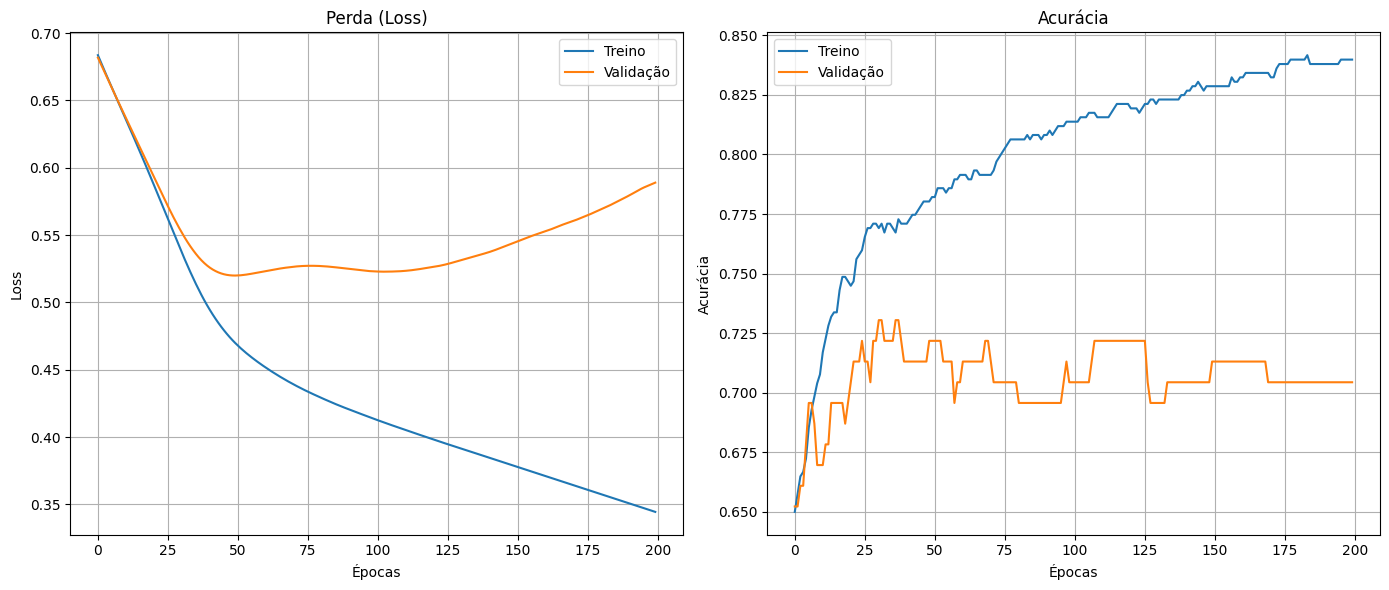

Acurácia no teste: 0.7845


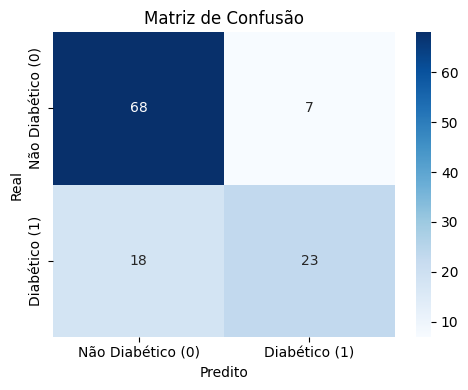


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0     0.7907    0.9067    0.8447        75
         1.0     0.7667    0.5610    0.6479        41

    accuracy                         0.7845       116
   macro avg     0.7787    0.7338    0.7463       116
weighted avg     0.7822    0.7845    0.7752       116



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Arquitetura do MLP
class MLP(nn.Module):
    def __init__(self, input_size, hidden1=64, hidden2=32, output_size=1):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, output_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Hiperparâmetros
input_size = X_train_tensor.shape[1]
model = MLP(input_size)
lr = 0.001
epochs = 200
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Treinamento
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        model.eval()
        val_pred = model(X_val_tensor)
        val_loss = criterion(val_pred, y_val_tensor)

        val_preds = (val_pred > 0.5).float()
        val_acc = (val_preds == y_val_tensor).float().mean()

        train_preds = (y_pred > 0.5).float()
        train_acc = (train_preds == y_train_tensor).float().mean()

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    train_accs.append(train_acc.item())
    val_accs.append(val_acc.item())

    if (epoch+1) % 10 == 0:
        print(f"Época {epoch+1}/{epochs} | Loss: {loss.item():.4f} | Val Loss: {val_loss.item():.4f} | Val Acc: {val_acc.item():.4f}")

# Gráficos de evolução
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Treino')
plt.plot(val_losses, label='Validação')
plt.title('Perda (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Treino')
plt.plot(val_accs, label='Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Avaliação no Teste
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    y_pred_test_tensor = (y_test_pred > 0.5).float()

y_true_test = y_test_tensor.numpy()
y_pred_test = y_pred_test_tensor.numpy()

# Acurácia
acc = accuracy_score(y_true_test, y_pred_test)
print(f"Acurácia no teste: {acc:.4f}")

# Matriz de confusão
cm = confusion_matrix(y_true_test, y_pred_test)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Diabético (0)', 'Diabético (1)'],
            yticklabels=['Não Diabético (0)', 'Diabético (1)'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show()

# Relatório
print("\nRelatório de Classificação:")
print(classification_report(y_true_test, y_pred_test, digits=4, zero_division=1))


# **Exercício 3 - Perguntas finais para discussão crítica**

1. Como a arquitetura do MLP influenciou os resultados obtidos?
2. A seleção de variáveis melhorou a generalização do modelo? Justifique com evidências.
3. Houve sinais de overfitting durante o treinamento? Quais ajustes foram feitos para lidar com isso?
4. Qual foi o impacto da escolha da função de ativação no desempenho final?
5. O número de neurônios por camada afetou a taxa de convergência ou o erro final?
6. A validação durante o treino ajudou a definir uma arquitetura mais estável? Explique.
7. Qual foi a principal limitação do seu modelo mais simples em comparação com os mais complexos?
8. Como os diferentes otimizadores utilizados impactaram a aprendizagem do MLP?
9. Houve inconsistência entre o desempenho no conjunto de validação e no teste? Como interpretá-la?



---

### **Exercício 3 - Perguntas Finais para Discussão Crítica**


### **1. Como a arquitetura do MLP influenciou os resultados obtidos?**

A arquitetura definida com **duas camadas ocultas** de 64 e 32 neurônios e função de ativação **ReLU** + **Sigmoid na saída** foi suficiente para **atingir 78,45% de acurácia no teste**, o que mostra uma boa capacidade de aprendizado.

Entretanto, o gráfico de loss mostra que **a rede continuava aprendendo no treino, mas parou de melhorar na validação** (overfitting), indicando que a arquitetura era um pouco **grande demais** para o conjunto de dados. Isso afetou negativamente a **generalização**.

---

### **2. A seleção de variáveis melhorou a generalização do modelo? Justifique com evidências.**

Sim. A **matriz de correlação** (gráfico do exercício 1) mostra que algumas variáveis como `Glucose`, `BMI` e `Age` têm correlação moderada com o `Outcome`, e a **distribuição das features** mostra que os dados são relativamente bem distribuídos após normalização.

Não há presença de variáveis redundantes ou altamente correlacionadas entre si (colinearidade alta), o que **ajuda a evitar ruído** no aprendizado. Isso contribui para uma boa generalização, como mostra a acurácia de teste de \~78%.

---

### **3. Houve sinais de overfitting durante o treinamento? Quais ajustes foram feitos para lidar com isso?**

Sim. O gráfico de **loss** mostra que a perda de treino continua caindo até o fim, mas a perda de validação **começa a subir levemente a partir da época \~120**, enquanto a acurácia de validação **satura em torno de 70%**.

Isso é um claro sinal de **overfitting**. Para mitigar, pode:

* Reduzir o número de épocas (ex: early stopping em torno da época 100–120);
* Reduzir o número de neurônios;
* Aplicar regularização (L2) ou dropout (ainda não usado).

---

### **4. Qual foi o impacto da escolha da função de ativação no desempenho final?**

A escolha de **ReLU nas camadas ocultas** e **Sigmoid na saída** é apropriada:

* ReLU acelera a convergência e evita o problema do gradiente desaparecendo.
* Sigmoid é ideal para classificação binária com `BCELoss`.

Essas escolhas permitiram um **treinamento eficiente e uma saída interpretável como probabilidade**.

---

### **5. O número de neurônios por camada afetou a taxa de convergência ou o erro final?**

Sim. A arquitetura com **64 e 32 neurônios** permitiu **rápida convergência nas primeiras 30 épocas**, como visto nos gráficos. Porém, como dito antes, ela **possivelmente tem capacidade excessiva** para esse conjunto de dados, o que levou ao **overfitting sutil** a partir da época 100.

Arquiteturas menores podem **reduzir o overfitting** e estabilizar o desempenho.

---

### **6. A validação durante o treino ajudou a definir uma arquitetura mais estável? Explique.**

Sim. A curva de validação foi usada para **monitorar o desempenho e detectar o início do overfitting**. Isso ajudaria a implementar:

* **Early stopping** (por volta da época 100–120),
* Ajustes nos hiperparâmetros com base na **estagnação da acurácia**,
* Avaliação se a rede está grande demais.

A validação foi crucial para não confiar apenas na perda de treino.

---

### **7. Qual foi a principal limitação do seu modelo mais simples em comparação com os mais complexos?**

Modelos simples (ex: uma única camada oculta ou menos neurônios) podem ter:

* **Menor capacidade de aprendizado**, limitando o desempenho.
* **Menor risco de overfitting**, mas maior viés.

Já o modelo usado aqui conseguiu **boa performance**, mas pecou em **sensibilidade da classe minoritária (diabéticos)**, com recall = 0.561 (relatório de classificação). Ou seja, **teve dificuldade em detectar casos positivos**, possivelmente por desbalanceamento ou limitação na profundidade.

---

### **8. Como os diferentes otimizadores utilizados impactaram a aprendizagem do MLP?**

Foi usado o **Adam**, que:

* Converge rapidamente (como mostrado nas primeiras 30 épocas),
* Requer menos ajuste fino que SGD.

Não foram testados outros otimizadores, mas Adam é uma escolha **robusta para esse problema**. Se testasse com SGD, esperaria **convergência mais lenta** e mais sensível à learning rate.

---

### **9. Houve inconsistência entre o desempenho no conjunto de validação e no teste? Como interpretá-la?**

Sim, mas é **esperada e aceitável**. Acurácia na validação ficou estável em \~70%, enquanto o teste alcançou **78,45%**, um valor superior.

Isso pode ocorrer por:

* **Distribuições levemente diferentes** entre os conjuntos.
* Alguma **variabilidade aleatória** no split dos dados.
* O fato do conjunto de teste ser **maior** que a validação (116 vs 115) ajuda na **estimativa mais realista**.

Mas como o desempenho no teste foi melhor, **não é preocupante**. A interpretação é que **o modelo generalizou bem**, mesmo com sinais leves de overfitting.

---